In [5]:
# Imports
import math
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from PIL import Image

# 1.) Helper functions

In [6]:
# Load Dataset function
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [8]:
# Initilize initial value of w and b for parameters
def initialize_params(m):
    np.random.seed(3)
    w = np.random.randn(m, 1) * math.sqrt(2./m)
    b = 0
    return w, b

In [9]:
m = 2
w, b = initialize_params(m)
print('w = ' + str(w))
print('b = ' + str(b))

w = [[1.78862847]
 [0.43650985]]
b = 0


In [10]:
# Sigmoid
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

In [12]:
sigmoid(np.array([1, 2, 3]))

array([0.73105858, 0.88079708, 0.95257413])

# 2.) Logistic Regression

In [13]:
# Propagate
def propagate(w, b, X, Y):
    m = X.shape[1]

    # Forward Propagation
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    cost = (np.sum(Y * (-np.log(A)) + (1 - Y) * (-np.log(1 - A)))) / m

    # Backward Propagation
    db = (np.sum(A - Y)) / m
    dw = (np.dot(X, (A - Y).T)) / m
    cost = np.squeeze(cost)

    return cost, db, dw

In [14]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
cost, db, dw = propagate(w, b, X, Y)
print ("dw = " + str(dw))
print ("db = " + str(db))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [15]:
# Optimization
def optimize(w, b, X, Y, num_iter, lr, pc = False):
    costs = []
    for i in range(num_iter):
        cost, db, dw = propagate(w, b, X, Y)

        w = w - lr * dw
        b = b - lr * db

        if(i % 100 == 0):
            costs.append(cost)
        if pc and i % 100 == 0:
            print("cost after iteration %i:%f" %(i, cost))

    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}

    return params, grads, costs

In [17]:
params, grads, costs = optimize(w, b, X, Y, num_iter= 1000, lr = 0.009, pc = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
costs

w = [[-0.64226437]
 [-0.43498153]]
b = 2.2025594747904087
dw = [[ 0.06282959]
 [-0.01416124]]
db = -0.04847508604218078


[5.801545319394553,
 1.055933444321741,
 0.3783029181411113,
 0.36359491114822834,
 0.3562416177005574,
 0.3492096333906643,
 0.342420465089162,
 0.33586028201015944,
 0.32951704926683034,
 0.32337975629352356]

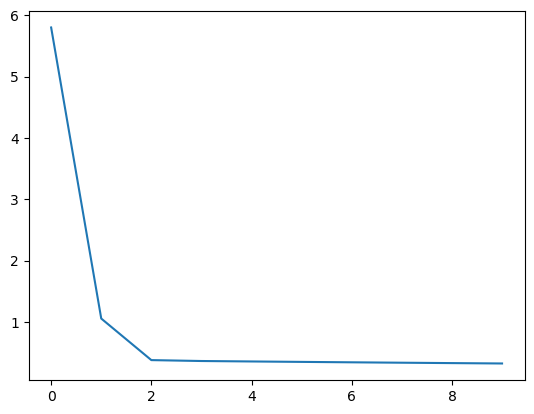

In [18]:
plt.plot(costs)